In [76]:
import os
import scipy.misc
import tensorflow as tf
import tensorflow.compat.v1 as tfc
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [77]:
# image_str = tfc.placeholder(tfc.string)
# im_tf = tfc.image.decode_image(image_str)
images = {"gt_input_im":[], "gt_target_im":[], "pred_target_im":[]}
tb_path = "/nethome/abati7/flash/Work/recon/zeronvs_diffusion/zero123/slurm_test_runs/2024-09-09T15-30-40_withPoses/testtube/version_0/tf/events.out.tfevents.1725910351.xaea-12.7385.0"
sess = tfc.InteractiveSession()
with sess.as_default():
    count = 0
    for e in tfc.train.summary_iterator(tb_path):
        for v in e.summary.value:
            if "_im" in v.tag:
                img = v.image
                image_data = tf.image.decode_image(img.encoded_image_string).numpy()
                img_array = np.array(image_data)
                img_pil = Image.fromarray(img_array)
                images[v.tag].append(img_pil)
sess.close()

ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


In [78]:
def split_images(im_array):
    arrs = []
    h = im_array.shape[0] // 4
    w = im_array.shape[1] // 8
    for r in range(4):
        for c in range(8):
            arrs.append(im_array[r*h:(r+1)*h,c*w:(c+1)*w,:])
    return arrs

In [80]:
root = "/nethome/abati7/flash/Work/recon/zeronvs_diffusion/zero123/slurm_test_runs/2024-09-09T15-30-40_withPoses/stitched_ims/"
for x in range(len(images['pred_target_im'])):
    pred_target_ims = split_images(np.asarray(images['pred_target_im'][x]))
    gt_input_ims = split_images(np.asarray(images['gt_input_im'][x]))
    gt_target_ims = split_images(np.asarray(images["gt_target_im"][x]))
    for y in range(len(pred_target_ims)):
        a,b,c = gt_input_ims[y], gt_target_ims[y], pred_target_ims[y]
        stitched = np.hstack((a,b,c))
        img_pil = Image.fromarray(stitched)
        img_pil.save(root+f"batch_{x}_img_{y}.png", lossless=True, quality=100)

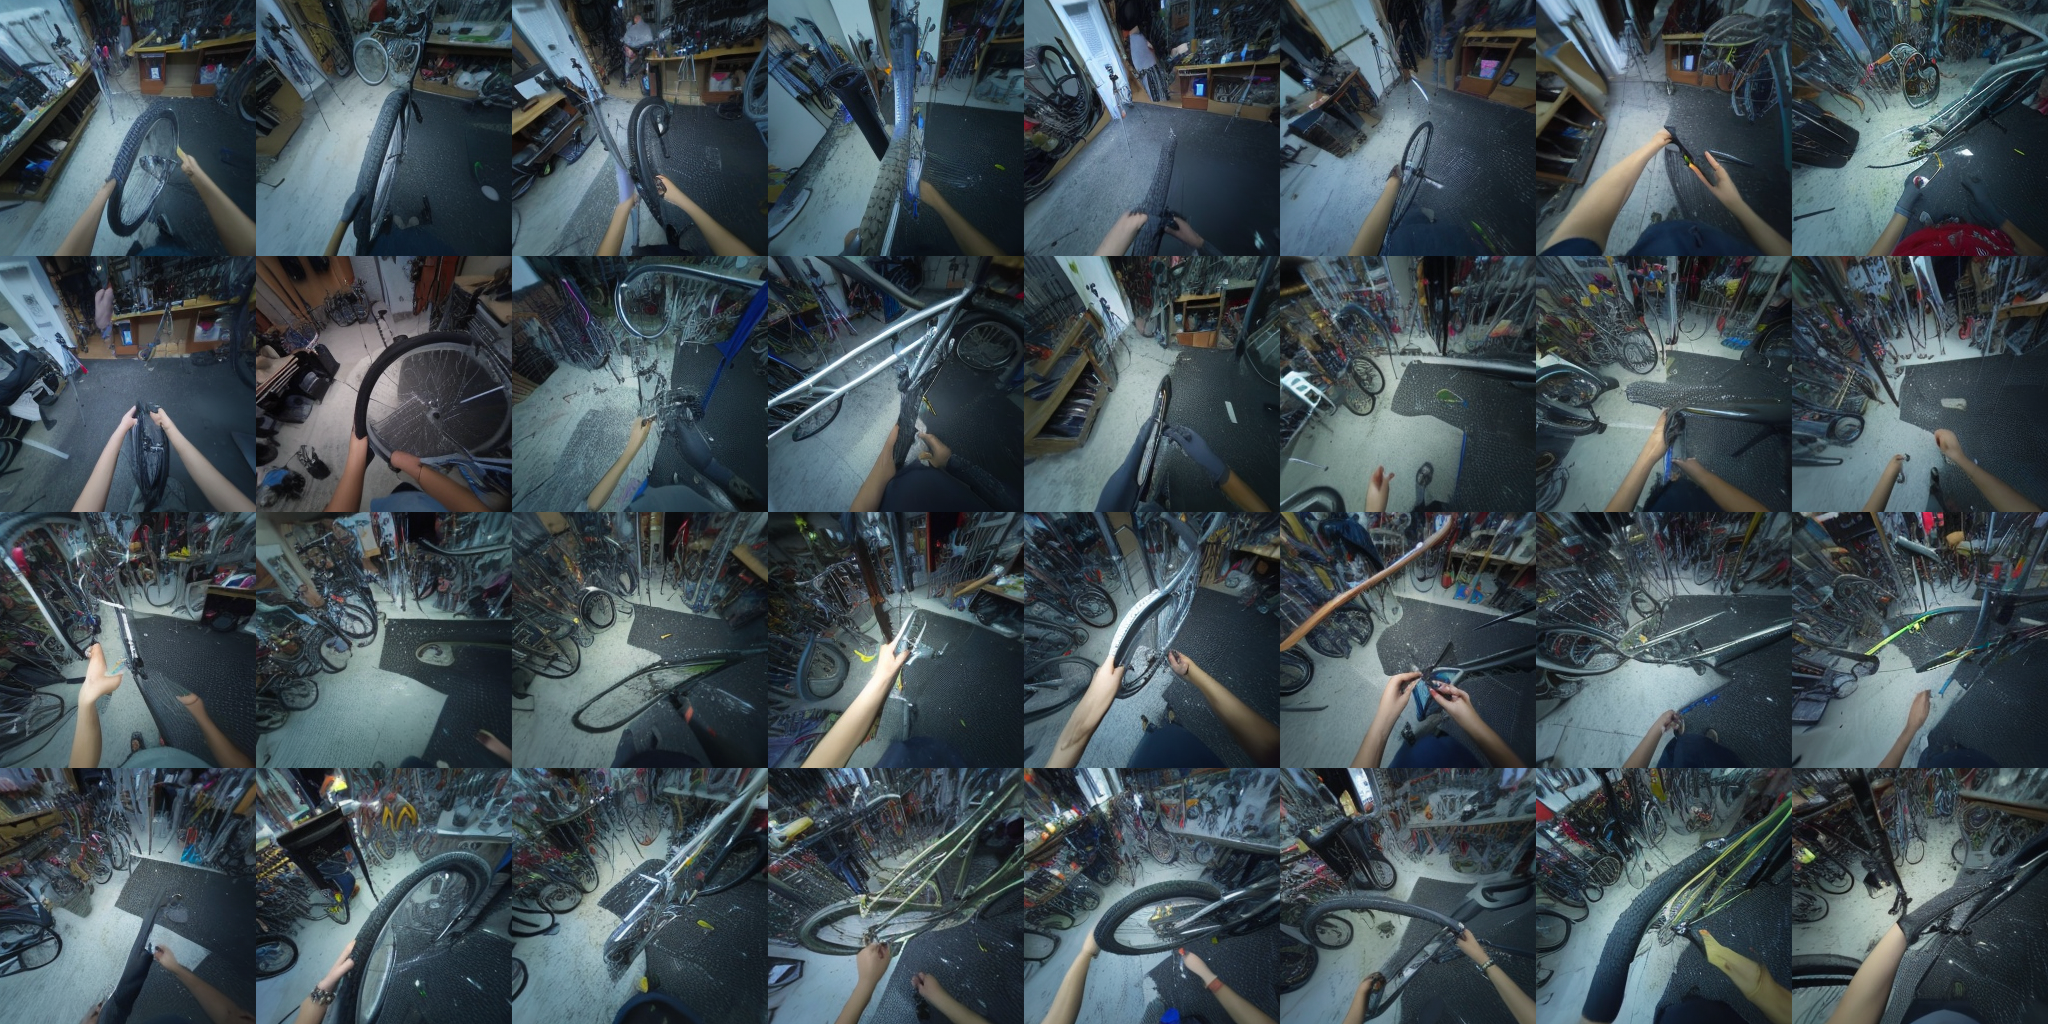

In [79]:
images['pred_target_im'][0]

In [67]:
test = Image.fromarray(s[-9])

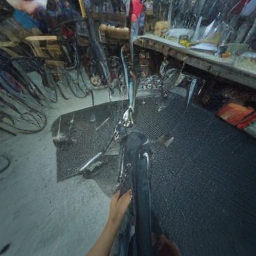

In [68]:
test